SVM tutorial 

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from sklearn import svm

In [19]:
muscle1_df = pd.read_excel(r"C:\Users\Thang Le\Documents\github\smart_pros\hand_jupyter_notebook\Rescaled_EMG_time.xlsx", sheet_name = "muscle_1")
muscle2_df = pd.read_excel(r"C:\Users\Thang Le\Documents\github\smart_pros\hand_jupyter_notebook\Rescaled_EMG_time.xlsx", sheet_name = "muscle_2")
muscle3_df = pd.read_excel(r"C:\Users\Thang Le\Documents\github\smart_pros\hand_jupyter_notebook\Rescaled_EMG_time.xlsx", sheet_name = "muscle_3")
muscle4_df = pd.read_excel(r"C:\Users\Thang Le\Documents\github\smart_pros\hand_jupyter_notebook\Rescaled_EMG_time.xlsx", sheet_name = "muscle_4")


In [20]:
muscle1_df.head() # checking the first 5
muscle2_df.head()
muscle3_df.head()
muscle4_df.head()

,Time stamp,Voltage (mV),Rescaled time (ms)
0,15:46:28.555 -> 3010,0.01,0
1,15:46:28.589 -> 3020,0.01,10
2,15:46:28.589 -> 3032,0.01,22
3,15:46:28.589 -> 3042,0.01,32
4,15:46:28.624 -> 3052,0.01,42


In [30]:
muscle1_df.columns = ['Time_stamp', 'Voltage', 'Rescaled_time']
muscle2_df.columns = ['Time_stamp', 'Voltage', 'Rescaled_time']
muscle3_df.columns = ['Time_stamp', 'Voltage', 'Rescaled_time']
muscle4_df.columns = ['Time_stamp', 'Voltage', 'Rescaled_time']


In [11]:
muscle1_df.head()

,Time_stamp,Voltage,Rescaled_time
0,15:38:13.804 -> 3010,0.68,0
1,15:38:13.804 -> 3020,0.66,10
2,15:38:13.804 -> 3032,0.64,22
3,15:38:13.842 -> 3042,0.64,32
4,15:38:13.842 -> 3052,0.62,42


In [12]:
muscle1_df.drop('Time_stamp',1)

,Voltage,Rescaled_time
0,0.68,0
1,0.66,10
2,0.64,22
3,0.64,32
4,0.62,42
...,...,...
294,0.43,3121
295,0.42,3131
296,0.41,3143
297,0.39,3153


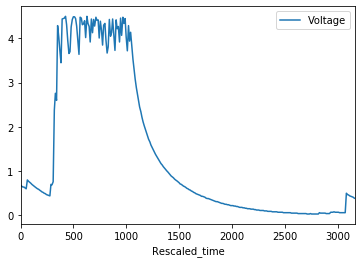

In [13]:
muscle1_df.plot(x = 'Rescaled_time', y = 'Voltage', kind='line')
mpl.show()

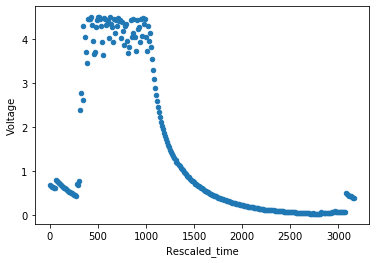

In [14]:
 muscle1_df.plot(x='Rescaled_time', y="Voltage", kind="scatter")

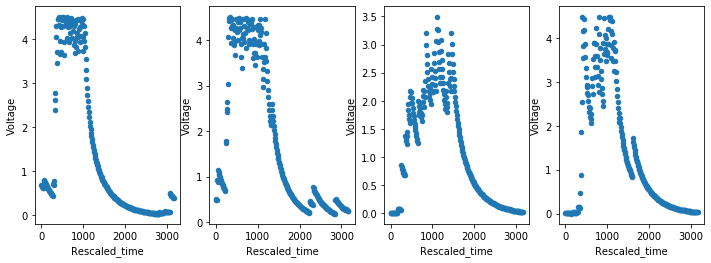

In [31]:
f, (ax1, ax2,ax3,ax4) = mpl.subplots(1,4, figsize=(12,4))
muscle1_df.plot(x='Rescaled_time', y="Voltage", ax=ax1, kind="scatter")
muscle2_df.plot(x='Rescaled_time', y="Voltage", ax=ax2, kind="scatter")
muscle3_df.plot(x='Rescaled_time', y="Voltage", ax=ax3, kind="scatter")
muscle4_df.plot(x='Rescaled_time', y="Voltage", ax=ax4, kind="scatter")


In [74]:
cup_df = pd.read_excel(r"C:\Users\Thang Le\Documents\github\smart_pros\hand_jupyter_notebook\hold_a_cup.xlsx", sheet_name="force2")
cup_df.head(10)


,Rest for 3 seconds...Rest for 2 seconds...Rest for 1 seconds...,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Start recording for holding movement of holdin...,Time(ms),muscle_1,muscle_2,muscle_3,muscle_4,muscle_5
1,3001 miliseconds,3001,1.83,1.29,0.99,1.61,1.89
2,3013 miliseconds,3013,1.74,1.23,0.96,1.54,1.79
3,3026 miliseconds,3026,1.65,1.2,1.22,1.48,1.71
4,3039 miliseconds,3039,1.58,1.15,1.17,1.42,1.63
5,3051 miliseconds,3051,1.51,1.21,1.11,1.36,1.56
6,3064 miliseconds,3064,1.44,1.15,1.07,1.3,1.49
7,3077 miliseconds,3077,1.38,1.1,1.03,1.26,1.43
8,3090 miliseconds,3090,1.33,1.28,1.21,1.21,1.37
9,3102 miliseconds,3102,1.27,1.22,1.15,1.16,1.31


In [82]:
cup_df.columns = ['raw_time', 'time', 'muscle_1', 'muscle_2', 'muscle_3', 'muscle_4', 'muscle_5']
cup_df = cup_df.drop('raw_time',1)
cup_df = cup_df.drop(0)

In [83]:
cup_df

,time,muscle_1,muscle_2,muscle_3,muscle_4,muscle_5
1,3001,1.83,1.29,0.99,1.61,1.89
2,3013,1.74,1.23,0.96,1.54,1.79
3,3026,1.65,1.2,1.22,1.48,1.71
4,3039,1.58,1.15,1.17,1.42,1.63
5,3051,1.51,1.21,1.11,1.36,1.56
...,...,...,...,...,...,...
549,9961,0.5,0.64,0.78,0.56,0.67
550,9973,0.49,0.62,0.76,0.55,0.65
551,9987,0.47,0.59,0.73,0.53,0.63
552,9999,0.46,0.58,0.71,0.51,0.63


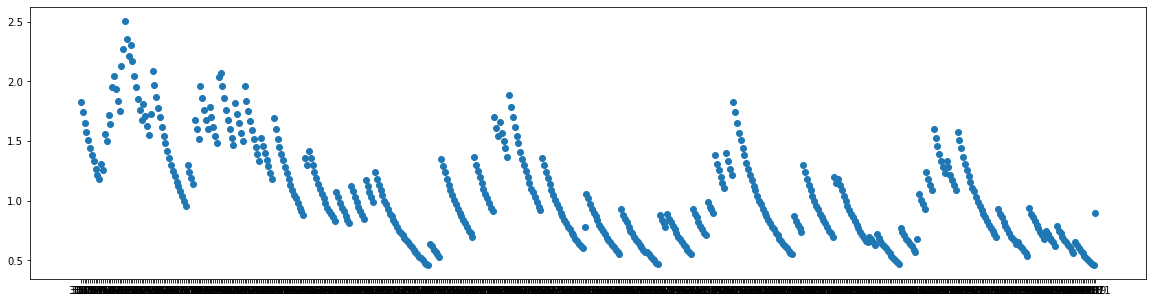

In [84]:
f, (ax1) = mpl.subplots(1,1, figsize=(20,5))
ax1.scatter(x=cup_df['time'], y=cup_df['muscle_1'])
'''
ax2.scatter(x=cup_df['time'], y=cup_df['muscle_2'])
ax3.scatter(x=cup_df['time'], y=cup_df['muscle_3'])
ax4.scatter(x=cup_df['time'], y=cup_df['muscle_4'])
ax5.scatter(x=cup_df['time'], y=cup_df['muscle_5'])
'''
mpl.show()